## Explore Zillow Exercises

Our scenario continues:

[switched to zillow scenario]

Do your work in a notebook named ```explore_zillow```. In addition, you should create a file named ```explore.py``` that contains the following functions for exploring your variables (features & target).

1. Write a function named ```plot_variable_pairs``` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 

import env
import wrangle
from wrangle import wrangle_telco
import explore

import warnings
warnings.filterwarnings('ignore')

In [2]:
# connection function for accessing mysql 
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

query = """
        SELECT bathroomcnt, 
               bedroomcnt, 
               regionidcounty,
               calculatedfinishedsquarefeet, 
               lotsizesquarefeet, 
               parcelid,  
               taxvaluedollarcnt             
        FROM properties_2017
        JOIN predictions_2017 using(parcelid)
        WHERE (transactiondate between "2017-05-01" and "2017-06-30")
        AND ((unitcnt = 1) or (propertylandusetypeid = 261))
        """

df = pd.read_sql(query, get_connection('zillow'))
df.head()

,bathroomcnt,bedroomcnt,regionidcounty,calculatedfinishedsquarefeet,lotsizesquarefeet,parcelid,taxvaluedollarcnt
0,2.0,3.0,3101.0,1458.0,8284.0,11289917,136104.0
1,1.0,2.0,3101.0,1421.0,6707.0,11705026,35606.0
2,3.0,4.0,1286.0,2541.0,4975.0,14269464,880456.0
3,2.0,3.0,3101.0,1650.0,7300.0,11389003,614000.0
4,1.0,2.0,3101.0,693.0,2908.0,11967869,274237.0


In [3]:
# Some prep
df = df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", 
                        "calculatedfinishedsquarefeet":"square_feet", 
                        "taxvaluedollarcnt": "tax_value", "parcelid":"parcel_id",
                        "lotsizesquarefeet":"lot_size", "regionidcounty":"county"})
df = df.set_index('parcel_id')

df

,bathrooms,bedrooms,county,square_feet,lot_size,tax_value
parcel_id,,,,,,
11289917,2.0,3.0,3101.0,1458.0,8284.0,136104.0
11705026,1.0,2.0,3101.0,1421.0,6707.0,35606.0
14269464,3.0,4.0,1286.0,2541.0,4975.0,880456.0
11389003,2.0,3.0,3101.0,1650.0,7300.0,614000.0
11967869,1.0,2.0,3101.0,693.0,2908.0,274237.0
...,...,...,...,...,...,...
12945108,2.0,3.0,3101.0,1536.0,8818.0,297097.0
14214719,3.0,5.0,1286.0,2655.0,6000.0,746963.0
11464823,3.0,4.0,3101.0,2305.0,5742.0,579047.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18752 entries, 11289917 to 12942897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    18752 non-null  float64
 1   bedrooms     18752 non-null  float64
 2   county       18752 non-null  float64
 3   square_feet  18727 non-null  float64
 4   lot_size     18402 non-null  float64
 5   tax_value    18752 non-null  float64
dtypes: float64(6)
memory usage: 1.0 MB


In [5]:
# some data cleaning 
df.square_feet.isnull().sum()

25

In [6]:
df.lot_size.isnull().sum()

350

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18381 entries, 11289917 to 12942897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    18381 non-null  float64
 1   bedrooms     18381 non-null  float64
 2   county       18381 non-null  float64
 3   square_feet  18381 non-null  float64
 4   lot_size     18381 non-null  float64
 5   tax_value    18381 non-null  float64
dtypes: float64(6)
memory usage: 1005.2 KB


In [9]:
def train_validate_test_split(df, seed=123):
    
    '''
    This function splits the zillow data into train, 
    validate and test data sets to use in classification
    modeling
    '''
    train_and_validate, test = train_test_split(df, test_size=0.2, random_state=seed)
    train, validate = train_test_split(train_and_validate, test_size=0.3, random_state=seed)
    return train, validate, test

train, validate, test = train_validate_test_split(df)

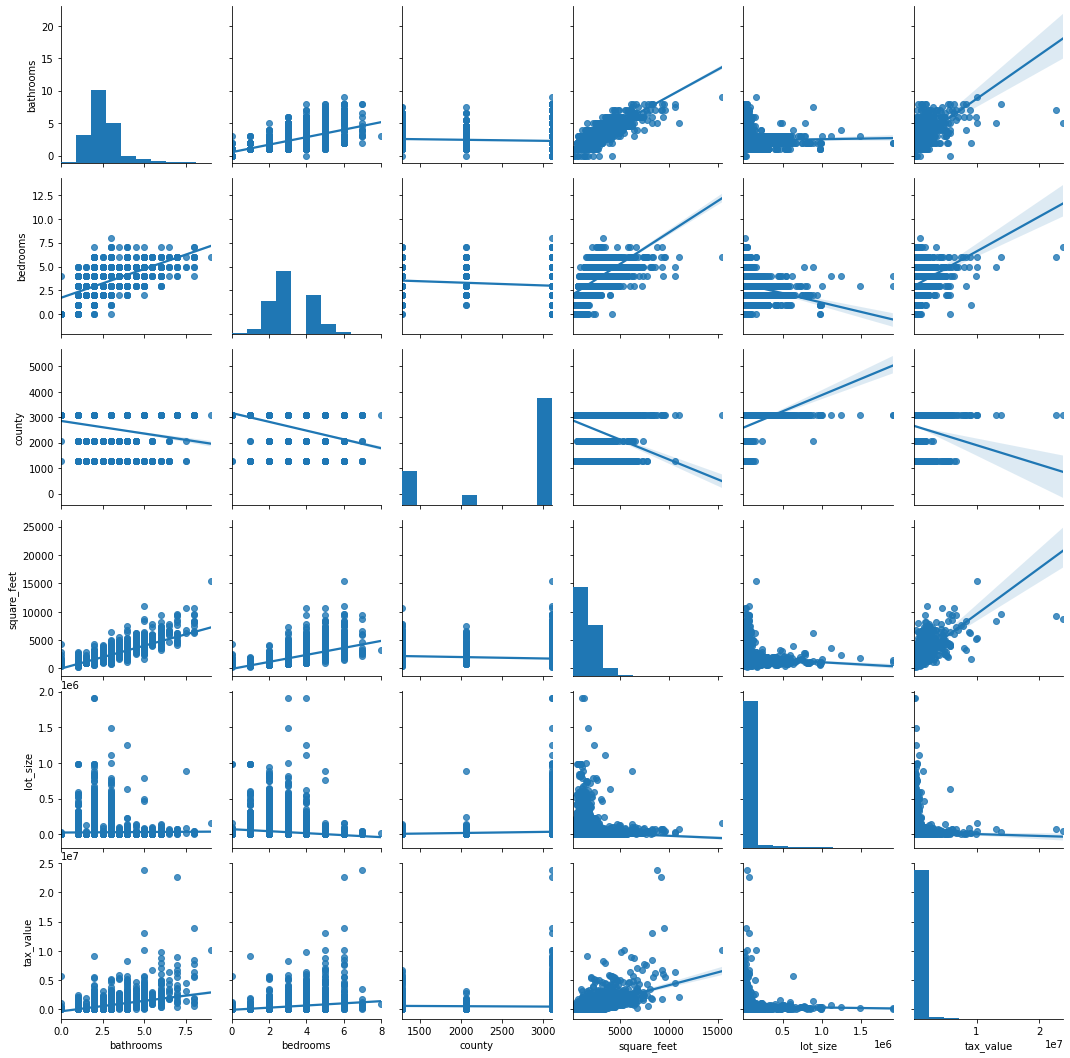

In [10]:
explore.plot_variable_pairs(train)

In [11]:
train.shape

(10292, 6)

2. Write a function named ```months_to_years``` that accepts your telco churn dataframe and returns a dataframe with a new feature ```tenure_years```, in complete years as a customer.


In [12]:
tel_train, tel_validate, tel_test = wrangle_telco()


In [13]:
tel_train

,customer_id,tenure,monthly_charges,total_charges
1256,7501-IWUNG,61,73.80,4616.05
225,1303-SRDOK,55,69.05,3842.60
662,3967-VQOGC,67,24.90,1680.25
628,3777-XROBG,58,19.55,1079.65
824,5075-JSDKI,59,24.45,1493.10
...,...,...,...,...
441,2664-XJZNO,72,104.90,7559.55
98,0567-XRHCU,69,43.95,2960.10
886,5334-AFQJB,72,25.10,1789.90
322,2001-MCUUW,46,108.65,4903.20


In [14]:
def months_to_years(df):
    df['tenure_years'] = df.tenure / 12
    return df

months_to_years(tel_train)

,customer_id,tenure,monthly_charges,total_charges,tenure_years
1256,7501-IWUNG,61,73.80,4616.05,5.083333
225,1303-SRDOK,55,69.05,3842.60,4.583333
662,3967-VQOGC,67,24.90,1680.25,5.583333
628,3777-XROBG,58,19.55,1079.65,4.833333
824,5075-JSDKI,59,24.45,1493.10,4.916667
...,...,...,...,...,...
441,2664-XJZNO,72,104.90,7559.55,6.000000
98,0567-XRHCU,69,43.95,2960.10,5.750000
886,5334-AFQJB,72,25.10,1789.90,6.000000
322,2001-MCUUW,46,108.65,4903.20,3.833333



3. Write a function named ```plot_categorical_and_continuous_vars``` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.



In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10292 entries, 10844239 to 12704069
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    10292 non-null  float64
 1   bedrooms     10292 non-null  float64
 2   county       10292 non-null  float64
 3   square_feet  10292 non-null  float64
 4   lot_size     10292 non-null  float64
 5   tax_value    10292 non-null  float64
dtypes: float64(6)
memory usage: 882.8 KB


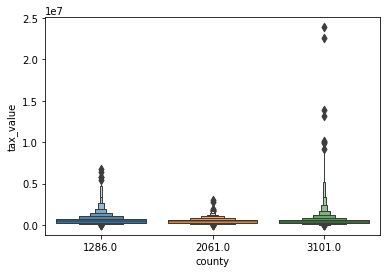

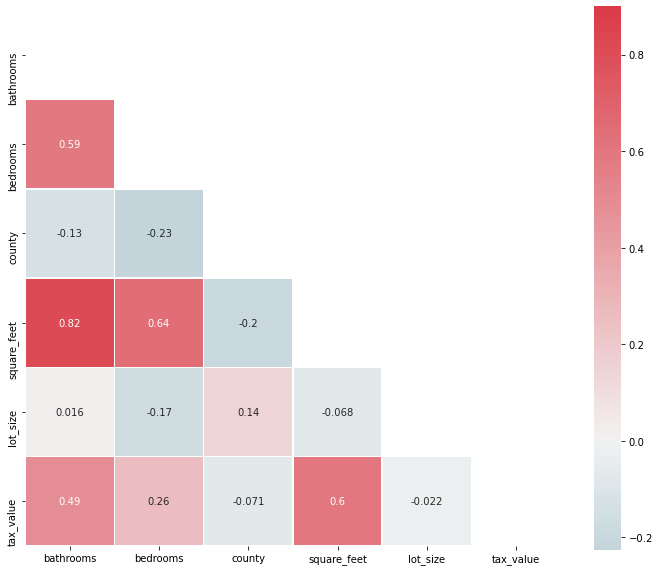

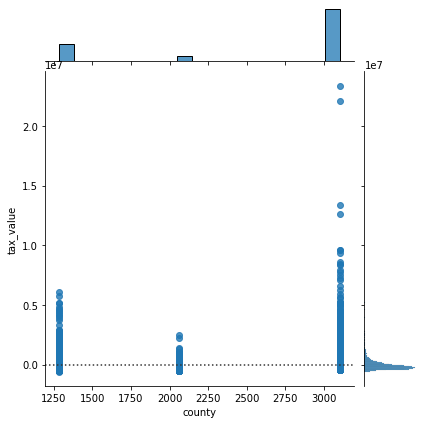

In [16]:
cat_vars = train['county']
quant_vars = train['tax_value']
target = train['tax_value']

explore.plot_categorical_and_continuous_vars(train, cat_vars, quant_vars)


4. Save the functions you have written to create visualizations in a file named ```explore.py```. Rewrite your notebook code so that you are using the functions imported from this file.

See uploaded explore.py file.

    

In [18]:
cat_vars = train['county']
quant_vars = train['tax_value']
target = train['square_feet']

# average = train[quant_vars].np.mean()
# p = sns.swarmplot(data=train, x=target, y=quant_vars, color='lightgray')
# p = plt.title(quant_vars)
# p = plt.axhline(average, ls='--', color='black')

5. Explore your dataset with any other visualizations you think will be helpful.




6. In a separate notebook, use the functions you have developed in this exercise with the mall customers dataset.

see mall_explore.ipynb